https://github.com/NanoComp/meep/blob/master/python/examples/straight-waveguide.ipynb  

https://stackoverflow.com/questions/29454002/filenotfounderror-errno-2-no-such-file-or-directory-ffmpeg


In [2]:
import math
import meep as mp
from meep import mpb

import numpy as np
import matplotlib.pyplot as plt

In [3]:
cell = mp.Vector3(16,16,0)
geometry = [mp.Block(mp.Vector3(12,1,mp.inf),
                     center=mp.Vector3(-2.5,-3.5),
                     material=mp.Medium(epsilon=12)),
            mp.Block(mp.Vector3(1,12,mp.inf),
                     center=mp.Vector3(3.5,2),
                     material=mp.Medium(epsilon=12))]
pml_layers = [mp.PML(1.0)]
resolution = 10


sources = [mp.Source(mp.ContinuousSource(wavelength=2*(11**0.5), width=20),
                     component=mp.Ez,
                     center=mp.Vector3(-7,-3.5),
                     size=mp.Vector3(0,1))]


sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000183105 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 10
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,2,0)
          size (1,12,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0453701 s
-----------


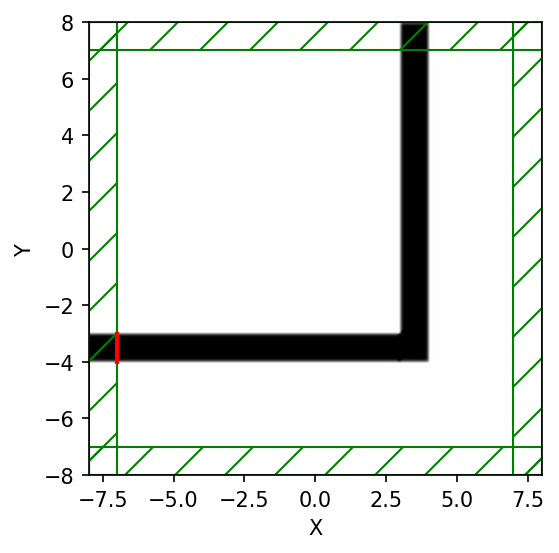

In [4]:
%matplotlib inline
f = plt.figure(dpi=150)
sim.plot2D(ax = f.gca())
plt.show()

In [5]:
T=0.5

f = plt.figure(dpi=150)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True)
im.run(mp.at_every(T,Animate),until=T*100)
plt.close()

Normalizing field data...
run 0 finished at t = 100.0 (2000 timesteps)


In [6]:
#Animate.to_gif(10,"test.gif")

filename = "bent_waveguide.mp4"
Animate.to_mp4(10,filename)

Generating MP4...


In [7]:
from IPython.display import Video
Video(filename)

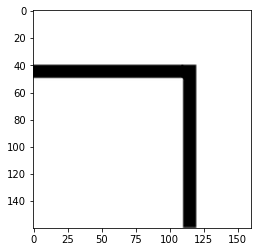

In [11]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
#plt.axis('off')
plt.show()

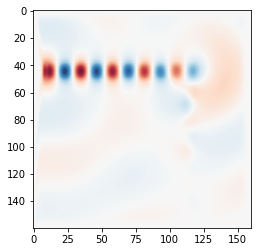

In [12]:
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
#plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
#plt.axis('off')
plt.show()